In [10]:
from algorithms.REINFORCE import Reinforce
%matplotlib inline
import gymnasium as gym
import highway_env
from matplotlib import pyplot as plt

# Controls:
CONTINUOUS_ACTIONS = False
TESTING = False
EPOCHS = 200
###########

if CONTINUOUS_ACTIONS and TESTING:
    env = gym.make("Pendulum-v1", render_mode="rgb_array")
elif CONTINUOUS_ACTIONS and not TESTING:
    env = gym.make('highway-fast-v0', config={"action": {"type": "ContinuousAction"}, "duration":60}, render_mode='rgb_array')
elif not CONTINUOUS_ACTIONS and TESTING:
    env = gym.make("CartPole-v1", render_mode="rgb_array")
elif not CONTINUOUS_ACTIONS and not TESTING:
    env = gym.make('highway-fast-v0', render_mode='rgb_array')
else:
    print("invalid controls, aborting...")
    quit()

urs_lst = []
ars_lst = []

model = Reinforce(env, epochs=EPOCHS, episodes_per_epoch=10, step_size_w=1e-3, step_size_theta=0.006, discount=0.85)
ur, ar = model.learn(verbose=True)
urs_lst.append(ur)
ars_lst.append(ar)
env.reset()
print("Training complete.")

Epoch: 1, Average Reward: 6.26
Epoch: 2, Average Reward: 10.81
Epoch: 3, Average Reward: 8.98
Epoch: 4, Average Reward: 13.37
Epoch: 5, Average Reward: 10.21
Epoch: 6, Average Reward: 9.20
Epoch: 7, Average Reward: 11.55
Epoch: 8, Average Reward: 11.11
Epoch: 9, Average Reward: 8.58
Epoch: 10, Average Reward: 12.36
Epoch: 11, Average Reward: 14.90
Epoch: 12, Average Reward: 16.07
Epoch: 13, Average Reward: 14.91
Epoch: 14, Average Reward: 11.28
Epoch: 15, Average Reward: 12.80
Epoch: 16, Average Reward: 15.19
Epoch: 17, Average Reward: 18.64
Epoch: 18, Average Reward: 12.76
Epoch: 19, Average Reward: 16.59
Epoch: 20, Average Reward: 18.41
Epoch: 21, Average Reward: 17.01
Epoch: 22, Average Reward: 16.42
Epoch: 23, Average Reward: 17.10
Epoch: 24, Average Reward: 18.13
Epoch: 25, Average Reward: 14.33
Epoch: 26, Average Reward: 19.24
Epoch: 27, Average Reward: 18.95
Epoch: 28, Average Reward: 20.31
Epoch: 29, Average Reward: 20.81
Epoch: 30, Average Reward: 21.77
Epoch: 31, Average Rewa

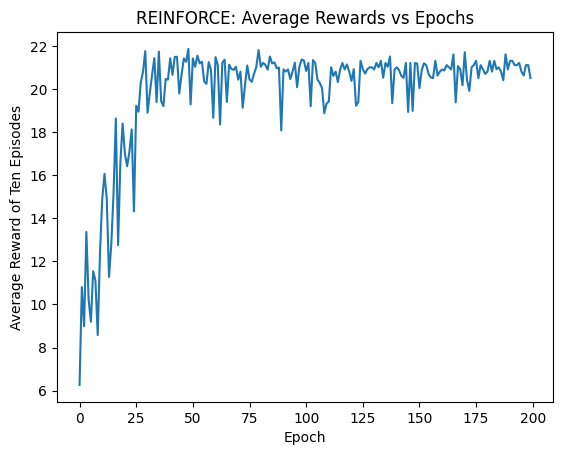

In [11]:
#fig, axs = plt.subplots(2, 3)
#for i in range(2):
#    for j in range(3):
#        axs[i,j].plot(ars_lst[(i*3)+j])
#        axs[i,j].set_title(configs[(i*3)+j])
plt.plot(ars_lst[0])
plt.title(f"REINFORCE: Average Rewards vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Average Reward of Ten Episodes")
plt.show()

In [14]:
from gymnasium.wrappers import RecordVideo
import datetime
dt = datetime.datetime.now()
# Define class to record test output runs
env = gym.make('highway-v0', config={"duration":60}, render_mode='rgb_array')
env = RecordVideo(env, video_folder="videos/", episode_trigger=lambda e: True, name_prefix=f"vpg_eval_{dt.day}d{dt.hour}h{dt.minute}m{dt.second}s")
# Evaluation loop, deterministically stepping in our environment to test our learned actor policy
for episode in range(5):
    obs, info = env.reset()
    done = truncated = False
    score = 0
    while not (done or truncated):
        action, _ = model.predict(obs)
        next_obs, reward, done, truncated, info = env.step(action)
        obs = next_obs
        score += reward
    print(f"Recorded Episode {episode+1}: Score = {score:.2f}")
env.close()
print("Videos saved to 'videos/' folder.")

C:\Users\carey\AppData\Local\Programs\Python\Python313\Lib\site-packages\gymnasium\wrappers\rendering.py:293: UserWarning: WARN: Overwriting existing videos at C:\Users\carey\OneDrive\Desktop\Work\Uni\Year 3\Reinforcement Learning\Coursework1\videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Recorded Episode 1: Score = 41.36
Recorded Episode 2: Score = 42.69
Recorded Episode 3: Score = 44.03
Recorded Episode 4: Score = 40.03
Recorded Episode 5: Score = 42.69
Videos saved to 'videos/' folder.


In [13]:
with open("save_data/reinforce_highway_discrete_ars_31c.txt", "w") as f:
    f.write(str(ars_lst))
with open("save_data/reinforce_highway_discrete_urs_31c.txt", "w") as f:
    f.write(str(urs_lst))